In [56]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import re
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
%matplotlib inline

In [57]:
MIN_COUNT = 5 # the minimal number of occurences for a particular word in order to be included
SIZE = 100 # the size of the embedding
TEST_SET = 0.2
T_SNE = False
K_MEANS = True
CLASSIFIER = True
DM = 0

In [58]:
dataset = fetch_20newsgroups(subset='all', shuffle=True)

In [59]:
def preproc(line):
    line = re.sub('[!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n]', ' ', line)
    line = re.sub('[0-9]', '', line)
    words = line.lower().split()
    proper = []
    for word in words:
        if len(word) > 2:
            proper.append(word)
    return proper

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=TEST_SET)
X_train, X_test = [preproc(line) for line in X_train], [preproc(line) for line in X_test]
X_train = [TaggedDocument(doc, [i]) for i, doc in enumerate(X_train)]
X_test = [TaggedDocument(doc, [i]) for i, doc in enumerate(X_test)]

In [60]:
model = Doc2Vec(size=SIZE, dm=DM, min_count=5)
model.build_vocab(X_train)
model.train(X_train, total_examples=model.corpus_count, epochs=model.epochs)

/home/ns/.local/lib/python3.6/site-packages/gensim/models/doc2vec.py:580: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [61]:
X_train = [model.docvecs[i] for i in range(len(X_train))]
X_test = [model.infer_vector(X_test[i][0]) for i in range(len(X_test))]

In [62]:
for reg in [1, 10, 100, 1000, 10000]:
    classifier = LogisticRegression(
                solver='lbfgs', max_iter=3000, multi_class='multinomial', C=reg)
    classifier.fit(X_train, y_train)
    print("Lambda: %f acc: %.3f " % (1/reg, classifier.score(X_test, y_test)))

Lambda: 1.000000 acc: 0.681 
Lambda: 0.100000 acc: 0.694 
Lambda: 0.010000 acc: 0.677 


/home/ns/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Lambda: 0.001000 acc: 0.667 
Lambda: 0.000100 acc: 0.658 


/home/ns/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


K = 2	Score = 0.533828
K = 3	Score = 0.505695
K = 4	Score = 0.399931
K = 5	Score = 0.265326
K = 6	Score = 0.211380
K = 7	Score = 0.159844
K = 8	Score = 0.154543
K = 9	Score = 0.195491
K = 10	Score = 0.173126
K = 11	Score = 0.086257
K = 12	Score = 0.120417
K = 13	Score = 0.094314
K = 14	Score = 0.079576
K = 15	Score = 0.073076
K = 16	Score = 0.075662
K = 17	Score = 0.084337
K = 18	Score = 0.076886
K = 19	Score = 0.054031
K = 20	Score = 0.058112
K = 21	Score = 0.054993
K = 22	Score = 0.043767
K = 23	Score = 0.037228
K = 24	Score = 0.050498


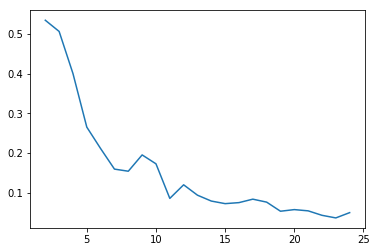

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances, silhouette_score

scores = []
for k in range(2, 25):
    model = KMeans(n_clusters=k).fit(X_train)
    labels = model.labels_
    score = silhouette_score(X_train, labels, metric='euclidean')
    scores.append(score)
    print('K = %d\tScore = %f' % (k, score))

plt.plot(np.arange(2, 25), scores)
plt.savefig('kmeans-doc2vec-DM.pdf')

In [48]:
print(max(scores))

0.51806164


In [107]:
X_all = X_train + X_test
y_all = np.concatenate([y_train, y_test])

In [108]:
tsne = TSNE(verbose=1, n_iter=250)
result = tsne.fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 15076 samples in 0.141s...
[t-SNE] Computed neighbors for 15076 samples in 96.521s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15076
[t-SNE] Computed conditional probabilities for sample 2000 / 15076
[t-SNE] Computed conditional probabilities for sample 3000 / 15076
[t-SNE] Computed conditional probabilities for sample 4000 / 15076
[t-SNE] Computed conditional probabilities for sample 5000 / 15076
[t-SNE] Computed conditional probabilities for sample 6000 / 15076
[t-SNE] Computed conditional probabilities for sample 7000 / 15076
[t-SNE] Computed conditional probabilities for sample 8000 / 15076
[t-SNE] Computed conditional probabilities for sample 9000 / 15076
[t-SNE] Computed conditional probabilities for sample 10000 / 15076
[t-SNE] Computed conditional probabilities for sample 11000 / 15076
[t-SNE] Computed conditional probabilities for sample 12000 / 15076
[t-SNE] Computed conditional probabilities for sa

In [109]:
import random 
def colors(n):
    ret = []
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    step = 256 / n
    for i in range(n):
        r += step
        g += step
        b += step
        r = int(r) % 256
        g = int(g) % 256
        b = int(b) % 256
        ret.append((r/256,g/256,b/256)) 
    return ret
colors = colors(20)

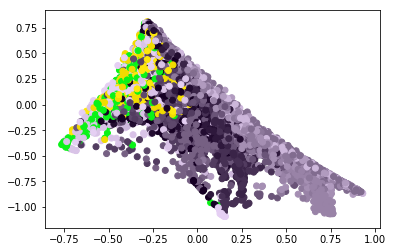

In [110]:
m = plt.get_cmap()
x = np.array(np.matrix(result)[:,0].reshape(1,-1))
y = np.array(np.matrix(result)[:,1].reshape(1,-1))
c = [colors[i] for i in y_train]
plt.scatter(x, y, c=c)
plt.savefig('doc2ec-non-def.pdf')